# **Testing the methodology of the paper on similar datasets and evaluating the model performance on different datasets**

#### This dataset conisit in a bank campaign marketing in 2008, HSBC launched a campaign to build awareness for personal banking services in Australia. At the time, most locals were unaware of HSBC either as a brand or as a personal ban

#### **Problem Statement**
#### In this case, we are going to analyze and predict which customer has deposit or liklyhood to put deposit
#### **Note:** A deposit is a financial term that means money held at a bank. A deposit is a transaction involving a transfer of money to another party for safekeeping

![foto123.png](attachment:a1db05d4-c199-401e-9eb1-6f5eb5bec82f.png)

In [24]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statistics import mean
import xgboost as xgb

In [26]:
# Read the data
df = pd.read_csv('bank.csv')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [28]:
df.shape

(11162, 17)

Observation: We have 11162 rows and 17 columns for this dataset

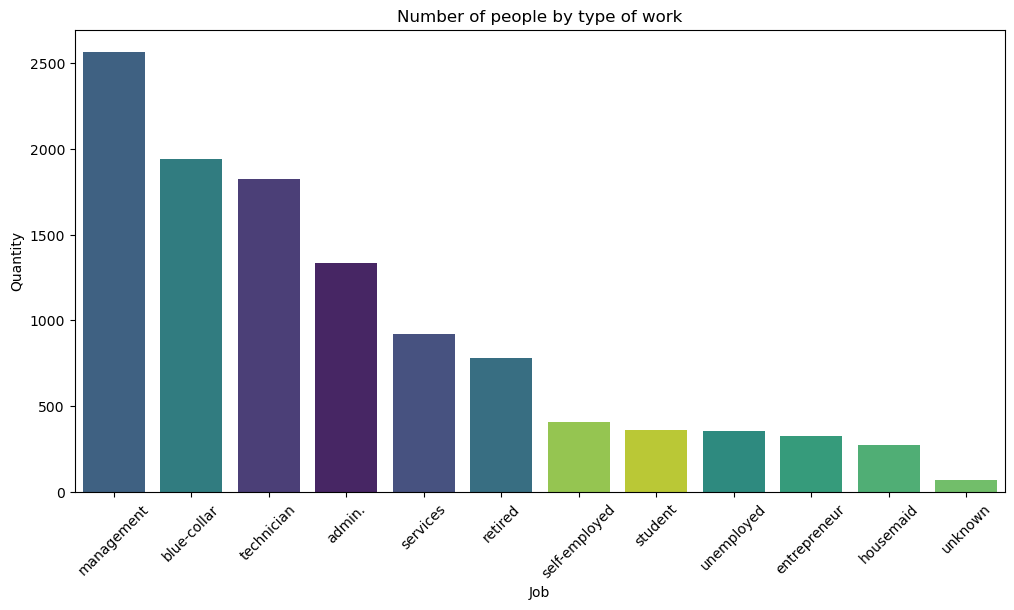

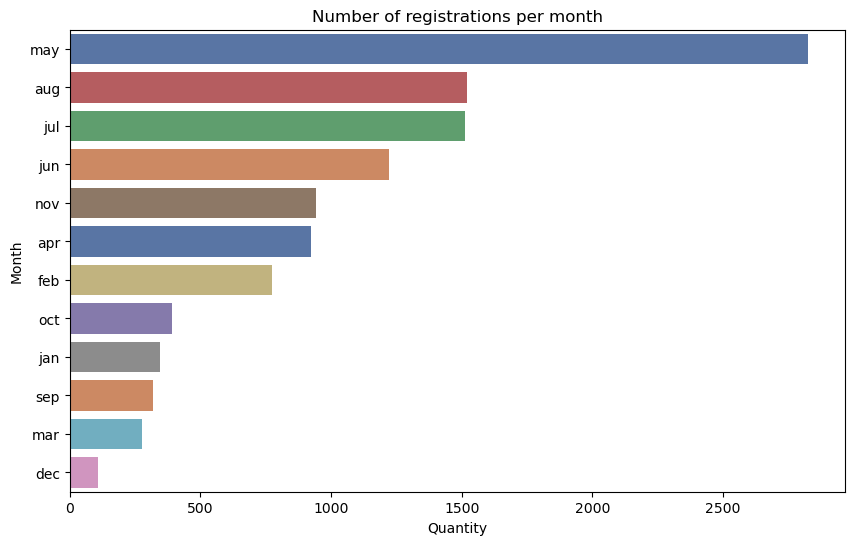

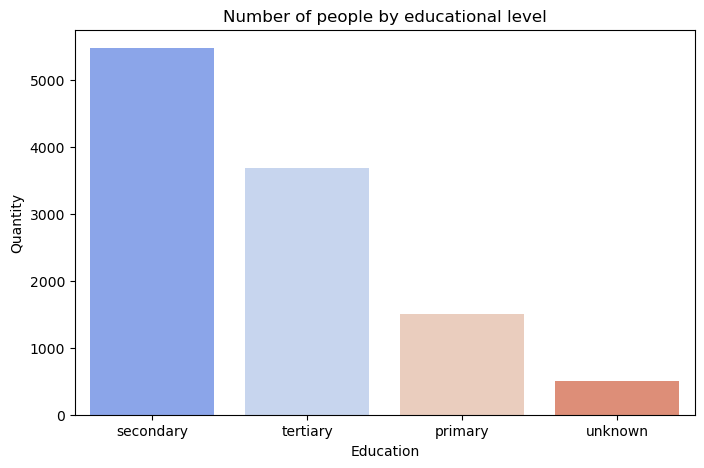

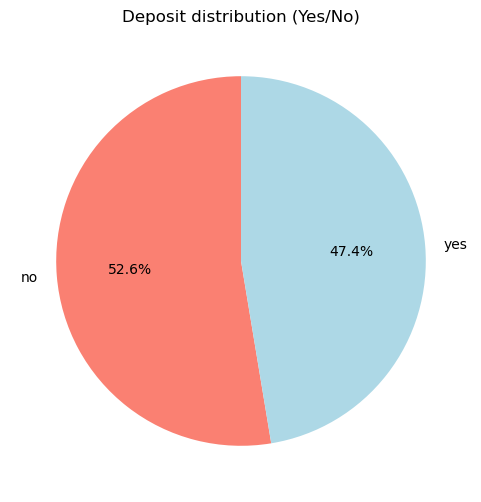

In [31]:
#Overall info for some categorical data

#Job column
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="job", hue="job", legend=False, palette="viridis", order=df["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of people by type of work")
plt.xlabel("Job")
plt.ylabel("Quantity")
plt.show()

#Month column
plt.figure(figsize=(10, 6))
sb.countplot(data=df, y="month", hue="month", legend=False, palette="deep", order=df["month"].value_counts().index)
plt.title("Number of registrations per month")
plt.xlabel("Quantity")
plt.ylabel("Month")
plt.show()


#Education column
plt.figure(figsize=(8, 5))
sb.countplot(data=df, x="education", hue="education", legend=False, palette="coolwarm", order=df["education"].value_counts().index)
plt.title("Number of people by educational level")
plt.xlabel("Education")
plt.ylabel("Quantity")
plt.show()

#Deposit column
plt.figure(figsize=(6, 6))
df["deposit"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["salmon", "lightblue"], startangle=90)
plt.title("Deposit distribution (Yes/No)")
plt.ylabel("")  # remove Y
plt.show()

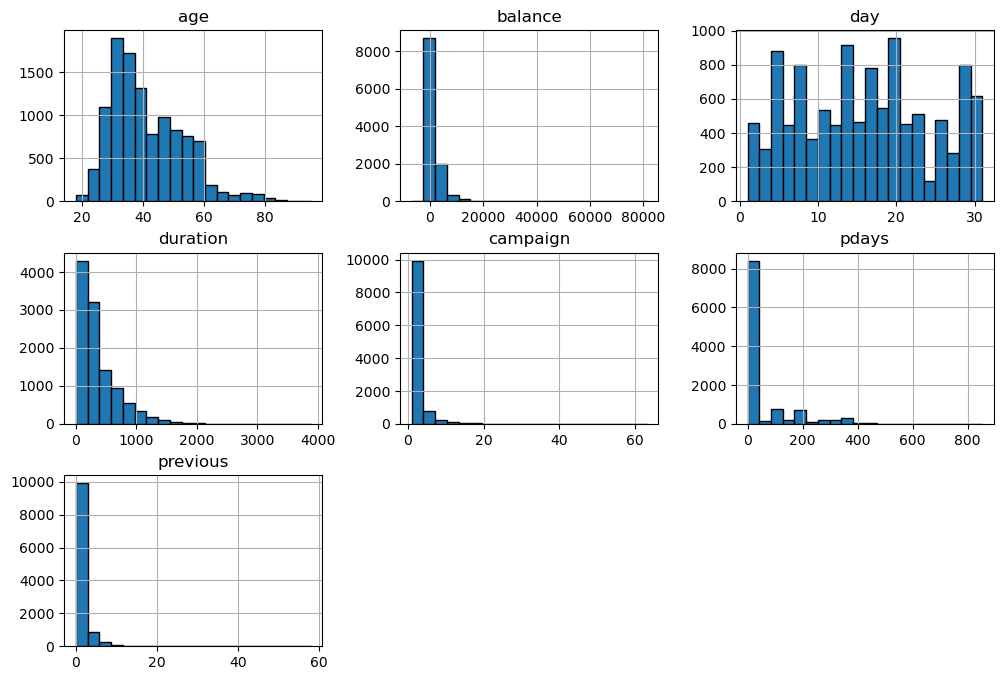

In [34]:
# Overall for numerical data
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()

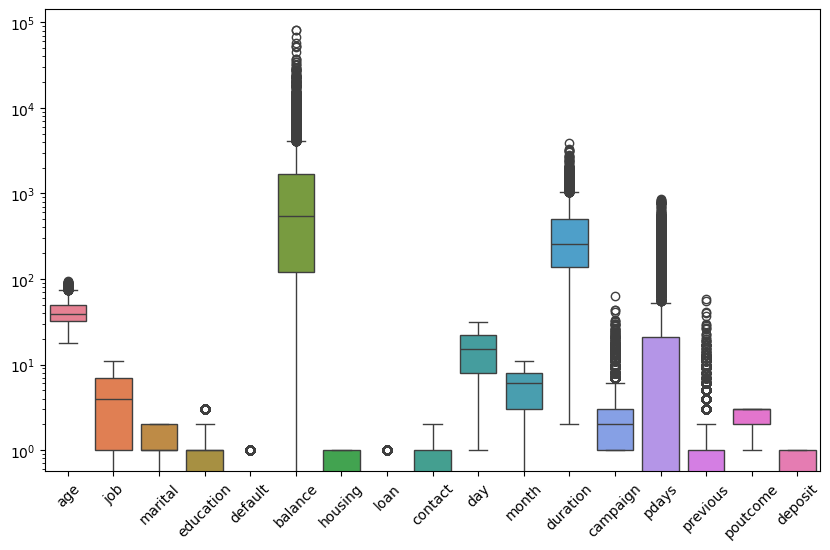

In [168]:
#Boxplot just to check the outliers 
plt.figure(figsize=(10, 6))
sb.boxplot(data=df)


plt.yscale("log")

plt.xticks(rotation=45) 
plt.show()

In [39]:
# checking missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Observation: We don't have missing values

In [43]:
df.duplicated().sum()

0

Observation: We don't have duplicates 

#### Encoding

In [48]:
# Identify object columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [50]:
#Performing label encoding
columns_to_encode = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

le = LabelEncoder()

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [52]:
#Performing ordinary encoding on education column
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [54]:
#Perform ordinary encoding on education column
encoder = OrdinalEncoder(categories=[['tertiary','secondary','primary', 'unknown']])

df['education'] = encoder.fit_transform(df[['education']])

# As the encoding its a float, I'll change it to int 
df['education'] = df['education'].astype(int)

In [56]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,0,0,184,0,0,2,5,8,673,2,-1,0,3,1


Observation: Since we have some features as categorical type we apply label encoding for: 

### Logistic regresssion

In [61]:
# Defining our target feature
X = df.drop('deposit', axis=1)
Y = df['deposit']

In [63]:
#splitting the data (67% Train data & 33% test data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [65]:
lr = LogisticRegression(random_state=16, max_iter=10000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=16)

In [66]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [67]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


### Desicion Tree

In [70]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, Y_train)

DecisionTreeClassifier()

In [71]:
Y_dt_pred = dt_clr.predict(X_test)
Y_dt_pred

array([0, 1, 1, ..., 0, 1, 1])

In [77]:
dt_clr_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_dt_pred})
dt_clr_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,1


### SVM

In [80]:
svc = SVC() #Model building
svc.fit(X_train, Y_train) #Model Training

SVC()

In [82]:
#Model Prediction
Y_svc_pred = svc.predict(X_test)

In [83]:
results_diff = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_svc_pred})
results_diff

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [86]:
# kernel= rbf and c=3
svc_opt = SVC(kernel='rbf', C=3, probability=True)
svc_opt.fit(X_train, Y_train)
Y_pred = svc_opt.predict(X_test)

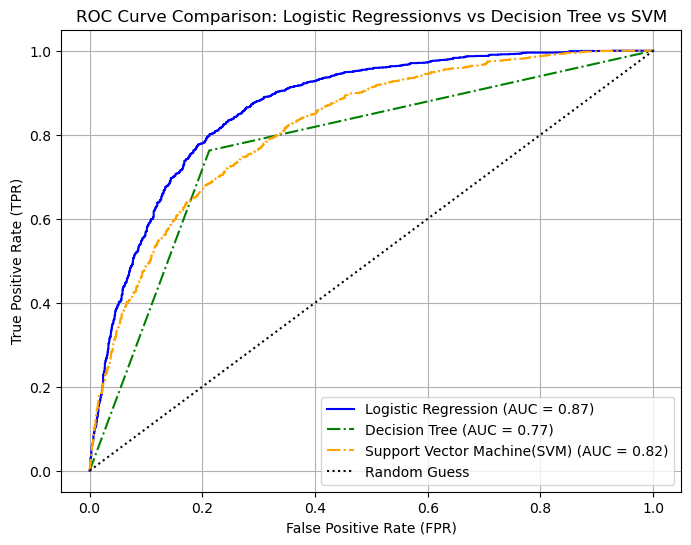

In [87]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc_opt.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)


# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regressionvs vs Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()

This are the results following the research paper process:

- The blue curve representing Logistic Regression has the highest AUC (0.87)
- The orange dashed line for SVM has an AUC of 0.82
- The green dashed-dotted line for the Decision Tree has an AUC of 0.78, making it the least effective classifier among the three.


## Contribution part 

### Logistic regresssion 2.0

In [95]:
X_2 = X.copy()
Y_2 = Y.copy()

In [99]:
from imblearn.over_sampling import SMOTE
Y.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [102]:
#Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_2, Y_2 = smote.fit_resample(X_2, Y_2)

In [105]:
Y_2.value_counts()

deposit
1    5873
0    5873
Name: count, dtype: int64

In [108]:
# spliting the data 
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.33, random_state=42)

In [111]:
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_2_train)
X_test_scaled = scaler.transform(X_2_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_2_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_2_test.columns)

In [113]:
lr = LogisticRegression(random_state=16, max_iter=10000)
lr.fit(X_2_train, Y_2_train)

LogisticRegression(max_iter=10000, random_state=16)

In [114]:
Y_2_pred = lr.predict(X_test_scaled)
Y_2_pred

array([1, 0, 0, ..., 0, 1, 1])

In [115]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [120]:
#confussion matrix
conf_matrix_lr = confusion_matrix(Y_2_test, Y_2_pred)
conf_matrix_lr

array([[1634,  282],
       [1222,  739]])

### Observations:
#### True Negatives (TN) = 1634
The model correctly predicted 1634 people as "No deposit."
#### False Positives (FP) = 282
The model incorrectly predicted 282 people as Deposit when they actually didn't (Type I error).
#### False Negatives (FN) = 1222
The model incorrectly predicted 1222 people as "No deposit" when they actually had diabetes (Type II error).
#### True Positives (TP) = 739
The model correctly predicted 739 people as "Deposit".

In [125]:
target_names = ['deposit', 'no deposit']
print(classification_report(Y_2_test, Y_2_pred, target_names=target_names))

              precision    recall  f1-score   support

     deposit       0.57      0.85      0.68      1916
  no deposit       0.72      0.38      0.50      1961

    accuracy                           0.61      3877
   macro avg       0.65      0.61      0.59      3877
weighted avg       0.65      0.61      0.59      3877



In [127]:
print(f'Accuracy score for linear regression classifier: {accuracy_score(Y_2_test, Y_2_pred):2f}')

Accuracy score for linear regression classifier: 0.612071


### Decision Tree 2.0

In [136]:
dt_clr_2 = DecisionTreeClassifier()
dt_clr_2.fit(X_train_scaled, Y_2_train)

DecisionTreeClassifier()

In [138]:
Y_dt_pred_2 = dt_clr.predict(X_test_scaled)
Y_dt_pred_2

array([0, 0, 0, ..., 1, 0, 0])

In [143]:
dt_clr_df_2 = pd.DataFrame({'Actual': Y_2_test, 'Predicted': Y_dt_pred_2})
dt_clr_df_2

,Actual,Predicted
11470,1,0
8742,0,0
1277,1,0
9112,0,0
10162,0,1
...,...,...
7220,0,1
11178,1,0
7360,0,1
1561,1,0


In [146]:
dt_accuracy = accuracy_score(Y_2_test, Y_dt_pred_2)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:2f}")

Accuracy for Decision Tree Classifier: 0.421460


#### Optimazing Decision Tree


In [150]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(criterion= 'entropy', max_depth=d), X_train_scaled, Y_2_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

In [158]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 7


In [160]:
dt_clr_opt = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dt_clr_opt.fit(X_train_scaled, Y_2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [166]:
Y_dt_opt_pred = dt_clr_opt.predict(X_test_scaled)

In [168]:
target_names = ['deposit', 'no deposit']
print(classification_report(Y_2_test, Y_dt_opt_pred, target_names=target_names))

              precision    recall  f1-score   support

     deposit       0.78      0.83      0.80      1916
  no deposit       0.82      0.78      0.80      1961

    accuracy                           0.80      3877
   macro avg       0.80      0.80      0.80      3877
weighted avg       0.80      0.80      0.80      3877



In [170]:
print(f"Accuracy score for the optimized decision tree classifier: {accuracy_score(Y_2_test, Y_dt_opt_pred)}")

Accuracy score for the optimized decision tree classifier: 0.8006190353366005


### SVM 2.0

In [174]:
svc_2 = SVC() #Model building
svc_2.fit(X_train_scaled, Y_2_train) #Model Training

SVC()

In [177]:
#Model Prediction
Y_svc_2_pred = svc.predict(X_test_scaled) 

In [180]:
results_diff_2 = pd.DataFrame({'Actual': Y_2_test, 'Predicted': Y_svc_2_pred})
results_diff_2

,Actual,Predicted
11470,1,0
8742,0,0
1277,1,0
9112,0,0
10162,0,0
...,...,...
7220,0,0
11178,1,0
7360,0,0
1561,1,0


In [183]:
# kernel= rbf and c=3
svc_opt_2 = SVC(kernel='linear', C=3, probability=True)
svc_opt_2.fit(X_train_scaled, Y_2_train)
Y_2_pred = svc_opt_2.predict(X_test_scaled)

In [184]:
target_names = ['deposit > 50', 'no deposit']
print(classification_report(Y_2_test, Y_2_pred, target_names=target_names))

              precision    recall  f1-score   support

deposit > 50       0.79      0.81      0.80      1916
  no deposit       0.81      0.79      0.80      1961

    accuracy                           0.80      3877
   macro avg       0.80      0.80      0.80      3877
weighted avg       0.80      0.80      0.80      3877



In [185]:
print(f'Accuracy score for SVM classifier: {accuracy_score(Y_2_test, Y_2_pred):2f}')

Accuracy score for SVM classifier: 0.801651


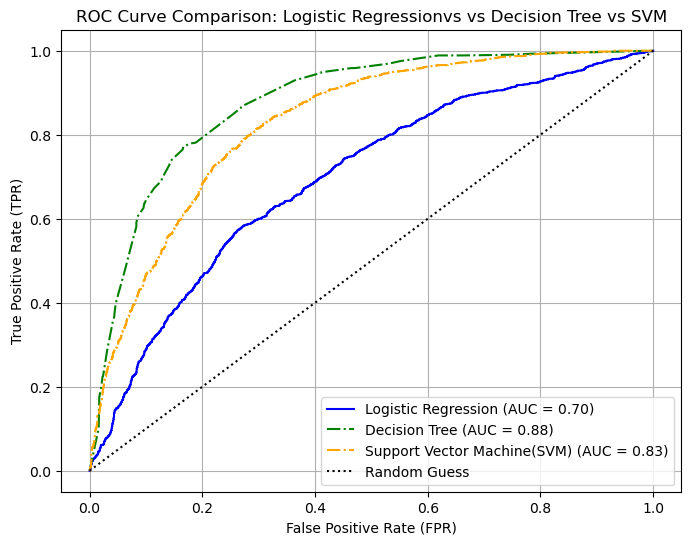

In [192]:
Y_lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
Y_dt_probs = dt_clr_opt.predict_proba(X_test_scaled)[:, 1]
Y_svm_probs = svc_opt.predict_proba(X_test_scaled)[:, 1]


# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_2_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_2_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_2_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)


# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regressionvs vs Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()

### XGBOOST (extra)

In [197]:
xg_train = xgb.DMatrix(X_2_train, Y_2_train)
xg_test = xgb.DMatrix(X_2_test, Y_2_test)

In [200]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_2_train, Y_2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [204]:
Y_xgb_pred = xgb_clf.predict(X_2_test)
Y_xgb_pred

array([1, 0, 0, ..., 0, 1, 1])

In [207]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_2_test, Y_2_test): .2f}')

Accuracy of XGBoost:  0.86


In [210]:
print(confusion_matrix(Y_2_test, Y_xgb_pred))

[[1613  303]
 [ 225 1736]]


In [213]:
print(classification_report(Y_2_test, Y_xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

deposit > 50       0.88      0.84      0.86      1916
  no deposit       0.85      0.89      0.87      1961

    accuracy                           0.86      3877
   macro avg       0.86      0.86      0.86      3877
weighted avg       0.86      0.86      0.86      3877



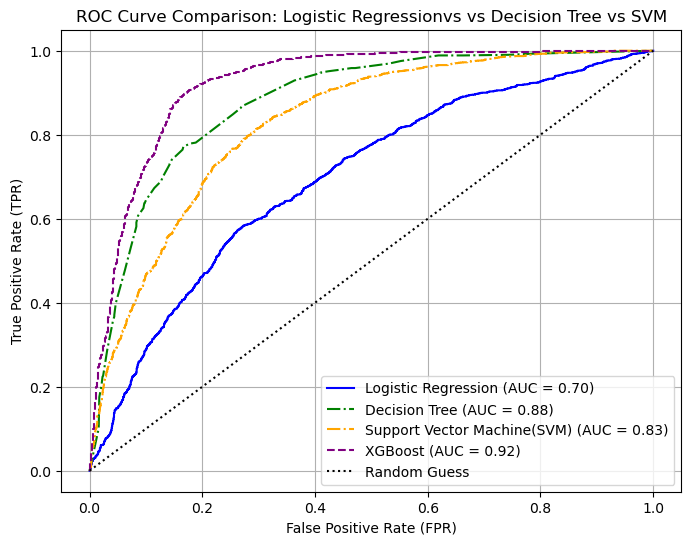

In [216]:
Y_lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
Y_dt_probs = dt_clr_opt.predict_proba(X_test_scaled)[:, 1]
Y_svm_probs = svc_opt.predict_proba(X_test_scaled)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_2_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_2_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_2_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_2_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_2_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regressionvs vs Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()

**XGBoost is the Best Performing Model**

- The XGBoost model (purple dashed line) has the highest AUC (0.92), indicating the best overall performance in distinguishing between positive and negative classes.
It consistently shows a high True Positive Rate (TPR) while maintaining a low False Positive Rate (FPR), making it the most reliable classifier in this comparison.

- Decision Tree and SVM Also Perform Well : The Decision Tree (AUC = 0.87) and Support Vector Machine (SVM, AUC = 0.83) both outperform Logistic Regression. The Decision Tree slightly outperforms the SVM, as seen in its higher ROC curve, meaning it is better at correctly classifying positive instances.

- Logistic Regression is the Weakest Model: The Logistic Regression model (blue line, AUC = 0.70) performs the worst among the tested models.